# Problem Statement:
## Analyze the heart disease dataset to explore the machine learning algorithms and build a decision tree model to predict the disease.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [107]:
df = pd.read_csv('HeartDisease.csv')
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [110]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1e189341d50>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'No'),
  Text(0.16741857967099594, -1.1882638676577466, 'Ys')],
 [Text(-0.08370923420885121, 0.5941319416663, '54.5%'),
  Text(0.0976608381414143, -0.693153922800352, '45.5%')])

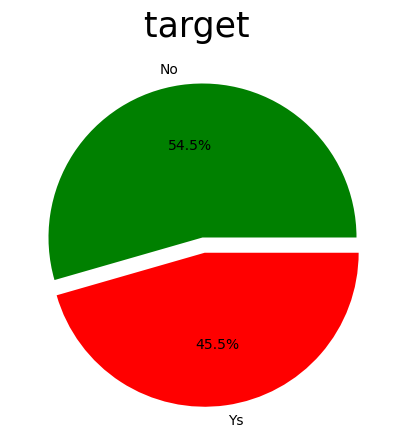

In [111]:
plt.figure(figsize=(5, 5))
sizes = df['target'].value_counts()
labels = ['No','Ys']
explode = [0,.1]
colors = ['Green','Red']
x = df['target'].value_counts().values
plt.title("target ", size = 25)
plt.pie(x,explode,labels,colors,autopct='%1.1f%%')

**From the given data we can notice that 54.5% people suffer from heart disease and 45.5% don't have Heart Disease

In [112]:
# Let's first analyze numerical data
df_num = df.select_dtypes(include = np.number)
df_num

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [113]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [114]:
df_num.drop(['gender','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca'],axis = 1, inplace = True)

In [115]:
df_num

,age,chest_pain,rest_bps,cholestrol,thalach,old_peak,thalassemia,target
0,63,3,145,233,150,2.3,1,1
1,37,2,130,250,187,3.5,2,1
2,41,1,130,204,172,1.4,2,1
3,56,1,120,236,178,0.8,2,1
4,57,0,120,354,163,0.6,2,1
...,...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,3,0
299,45,3,110,264,132,1.2,3,0
300,68,0,144,193,141,3.4,3,0
301,57,0,130,131,115,1.2,3,0


In [116]:
df_num.drop(['chest_pain','thalassemia','target'], axis=1, inplace=True)

In [117]:
df_num

,age,rest_bps,cholestrol,thalach,old_peak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


<Axes: xlabel='thalach', ylabel='Density'>

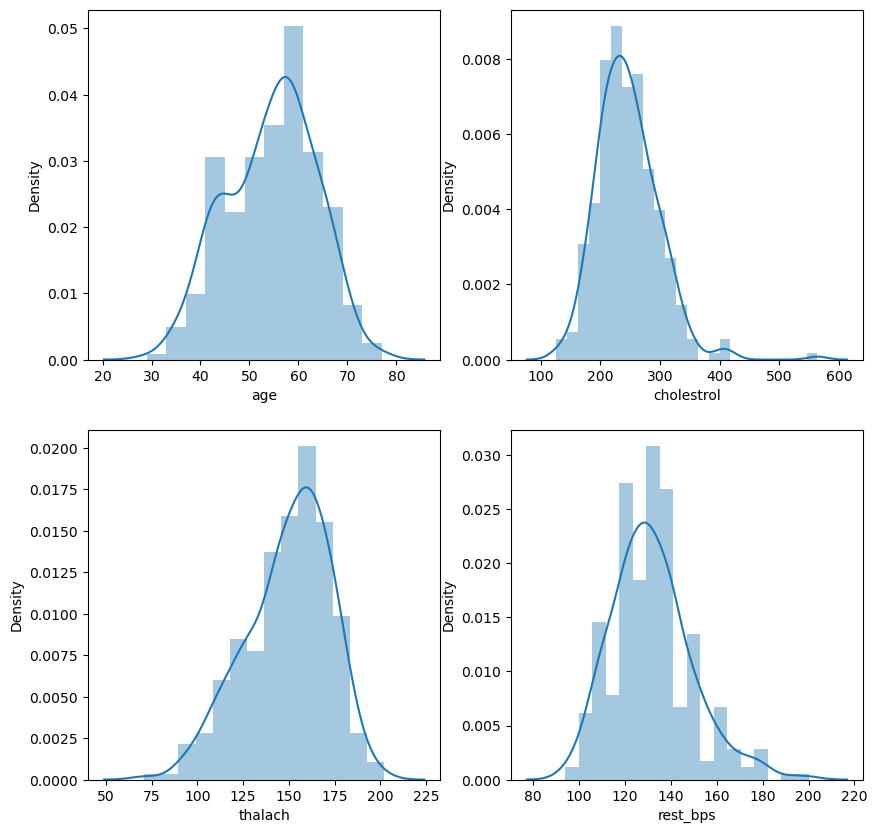

In [118]:
fig, axs=plt.subplots(2,2,figsize = (10, 10))
sns.distplot(a=df['age'], ax = axs[0][0])
sns.distplot(a=df['rest_bps'], ax = axs[1][1])
sns.distplot(a=df['cholestrol'], ax = axs[0][1])
sns.distplot(a=df['thalach'], ax = axs[1][0])

<Axes: xlabel='old_peak', ylabel='Density'>

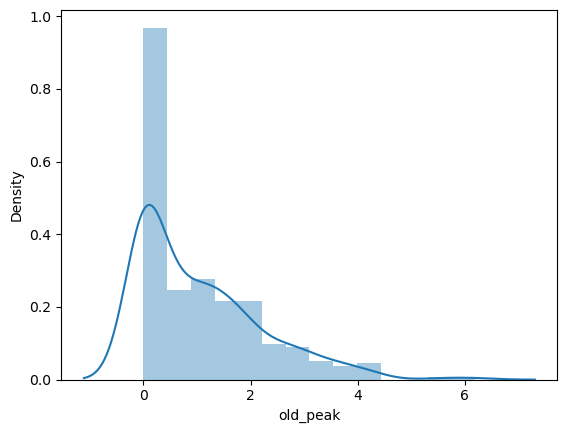

In [119]:
sns.distplot(a=df['old_peak'])

** From above insight in case of age most of people are lies between 45 and 70 and only few number of people are less than 45.
   And in case of cholestrol most of people have are lies between 200 and 700.And some number of people are less than 200.And      some outlier is also exist in cholestrol.
   In case of thalach most of people are lies between 110 to 190. And few number of people are lies less than 110 or greater        than 190. In case of rest_bps most of people bp have 100 to 160 and only few number of people are graeter than 160 that are outliers of rest_bps.In case of old_peak most of people have 0 to 3 and few number of people are greater than 4 to 6 that are outliers of old_peak

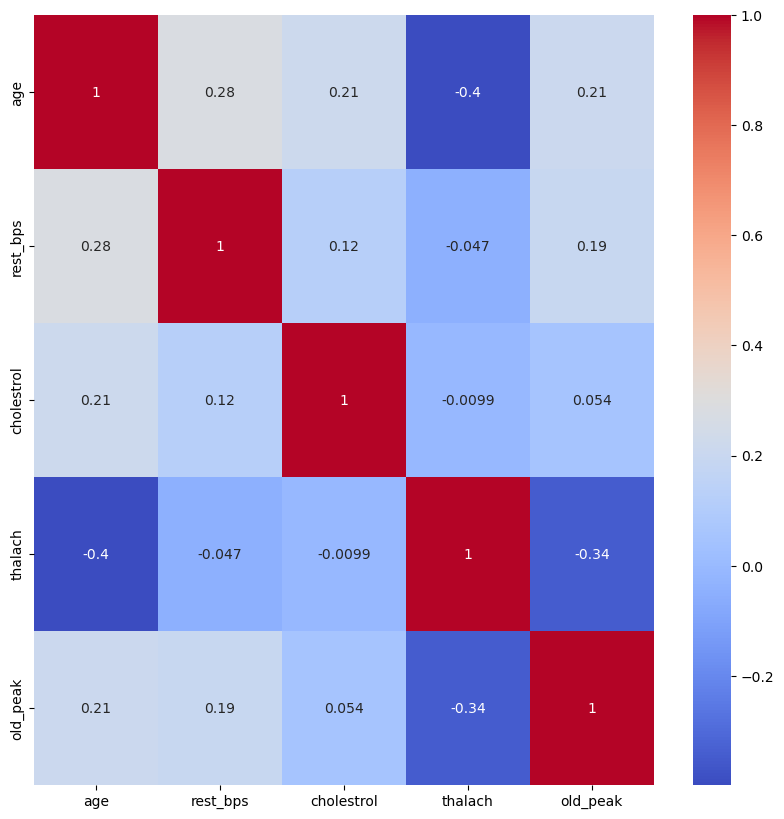

In [120]:
plt.figure(figsize = (10,10))
sns.heatmap(df_num.corr(), annot = True, cmap = 'coolwarm')
plt.show()

** From Above insight old peak and restbps and chloestrol are correlated to age.
   If age is increases most of people have increases their blood pressure and old_peak .

## Analyze the Categorical Data

In [121]:
df_cat = df.select_dtypes(include = np.object_)
df_cat.columns

Index([], dtype='object')

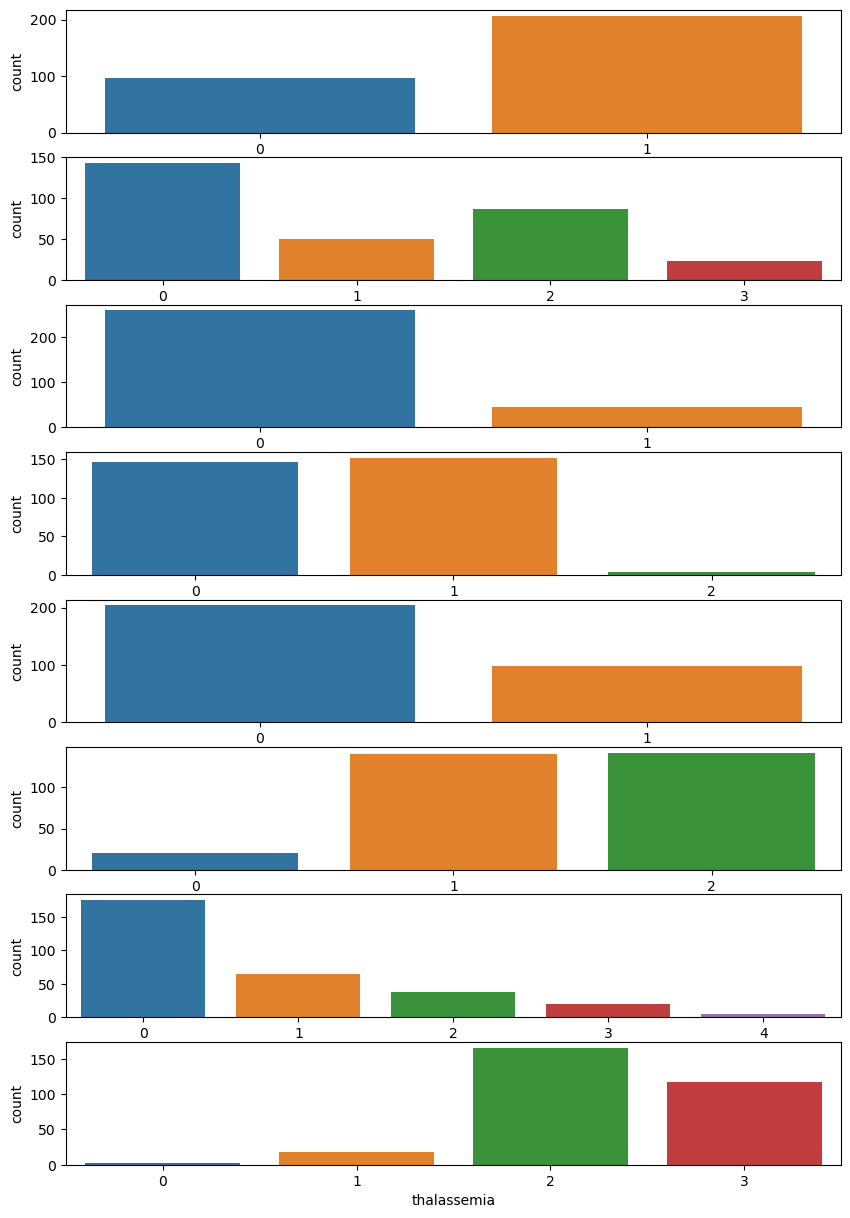

In [122]:
fig, ax = plt.subplots(8,1, figsize = (10,15))
cols = ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina','slope', 'ca','thalassemia']

for i ,val in enumerate(cols):
    sns.countplot(x = val, data=df, ax = ax[i])

<Axes: xlabel='slope', ylabel='count'>

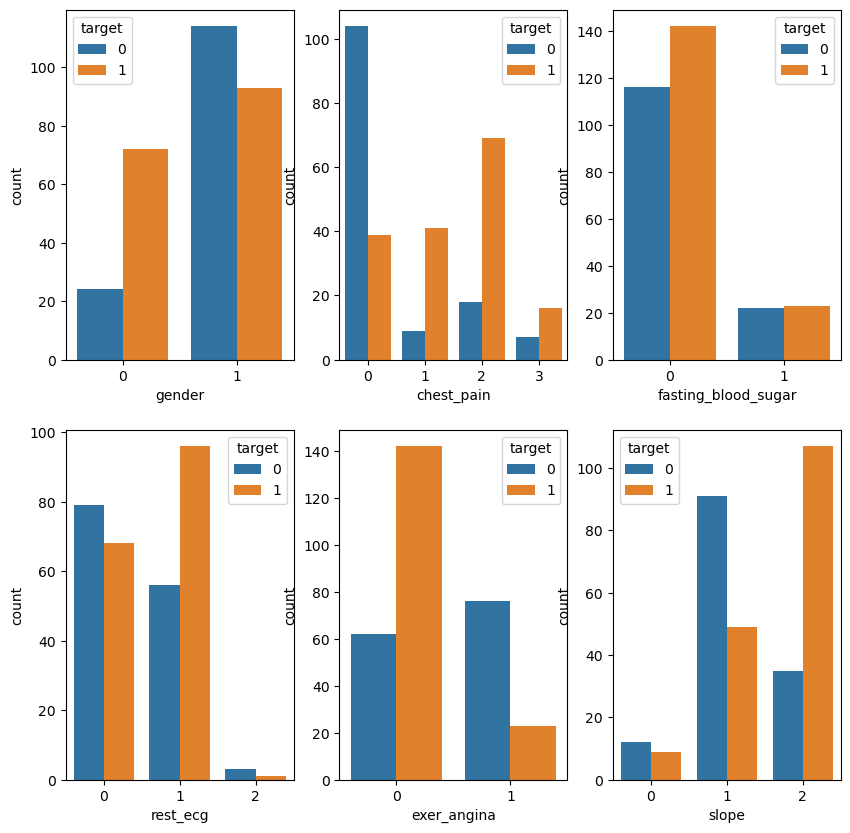

In [123]:
fig, ax = plt.subplots(2,3, figsize = (10,10))
sns.countplot(x = 'gender',hue = 'target', data=df, ax=ax[0][0])
sns.countplot(x = 'chest_pain',hue = 'target', data=df, ax=ax[0][1])
sns.countplot(x = 'fasting_blood_sugar',hue = 'target', data=df, ax=ax[0][2])
sns.countplot(x = 'rest_ecg',hue = 'target', data=df, ax=ax[1][0])
sns.countplot(x = 'exer_angina',hue = 'target', data=df, ax=ax[1][1])
sns.countplot(x = 'slope',hue = 'target', data=df, ax=ax[1][2])

<Axes: xlabel='thalassemia', ylabel='count'>

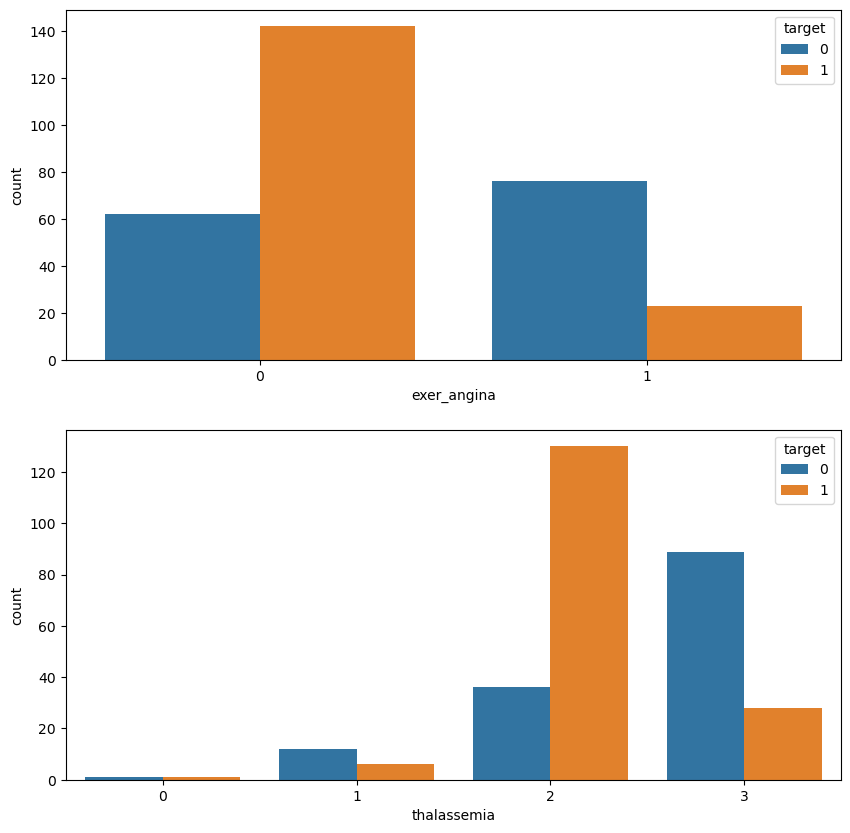

In [124]:
fig, ax = plt.subplots(2,1, figsize = (10,10))
sns.countplot(x = 'exer_angina',hue = 'target', data=df, ax=ax[0])
sns.countplot(x = 'thalassemia',hue = 'target', data=df, ax=ax[1])

**People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain. Maybe most people died after 2nd level of chest pain.Rest ecg is 1 then person have more chances of suffering from Heart Disease and rest ecg 2 then person have least chances of heart disease.People having fps>135 is having more chance of heart disease than people having fps<120.Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping) Therefore People having up sloping are more prone to Heart Disease than flat and downsloping.**

# Check the outliers

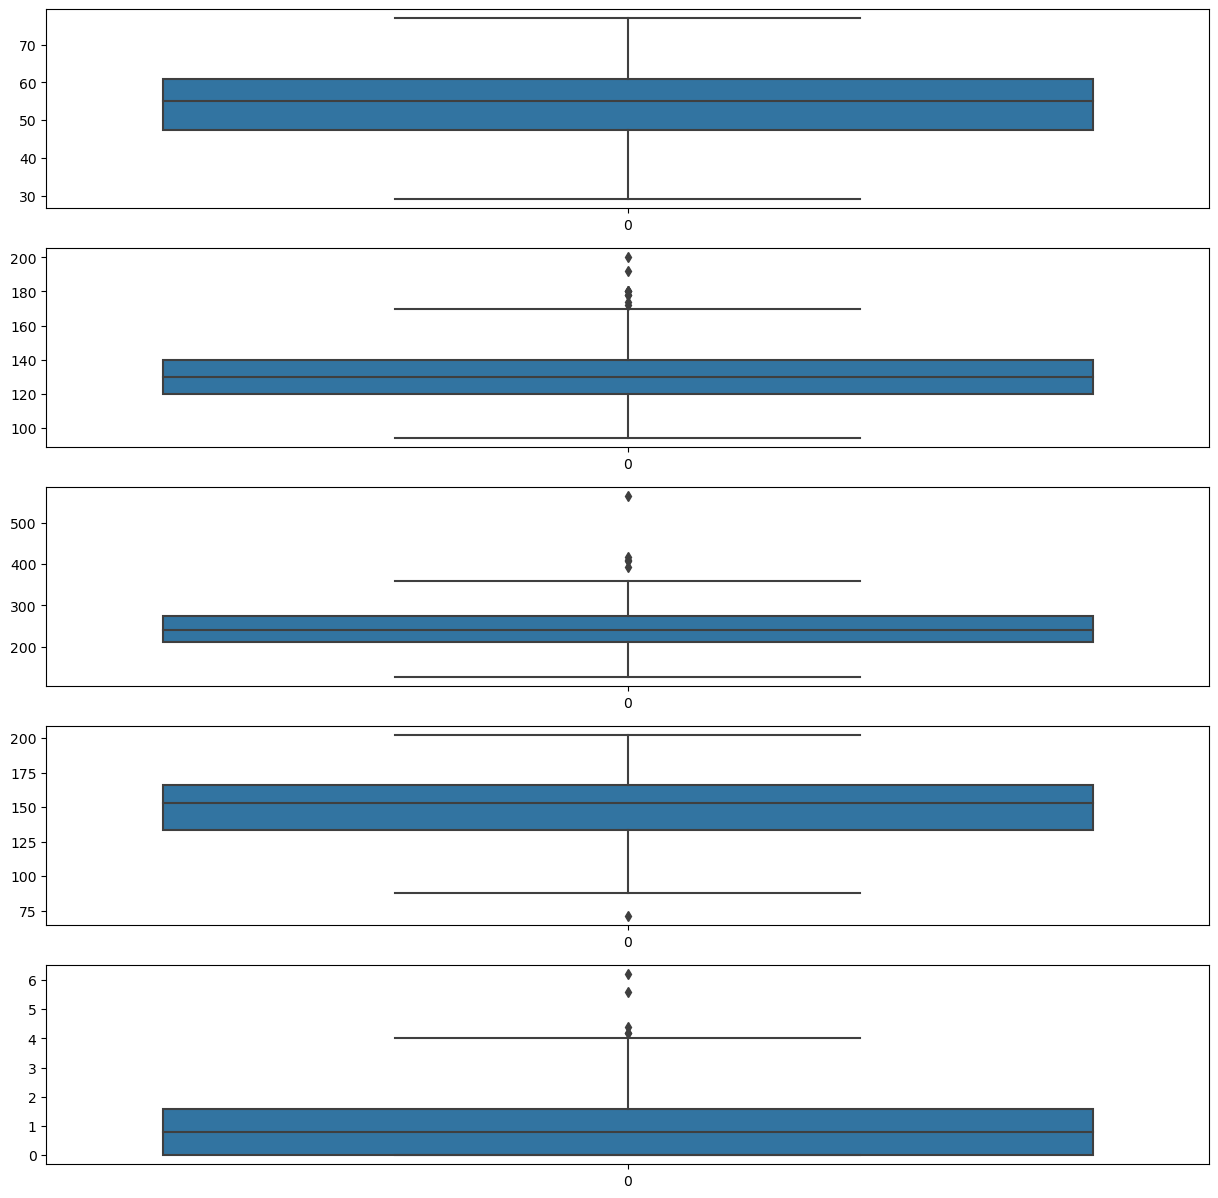

In [125]:
fig, axs = plt.subplots(5,1, figsize = (15,15))
plt1 = sns.boxplot(df['age'], ax=axs[0])
plt2 = sns.boxplot(df['rest_bps'], ax=axs[1])
plt3 = sns.boxplot(df['cholestrol'], ax=axs[2])
plt4 = sns.boxplot(df['thalach'], ax=axs[3])
plt4 = sns.boxplot(df['old_peak'], ax=axs[4])

# Feature Selection

**Chi2 test is used for find dependent and independent**

In [126]:
from sklearn.feature_selection import chi2

In [127]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [128]:
x1=df[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina','slope', 'ca','thalassemia']]
y1=df['target']

In [129]:
score = chi2(x1,y1)
score

(array([ 7.57683451, 62.59809791,  0.20293368,  2.97827075, 38.91437697,
         9.8040952 , 66.44076512,  5.79185297]),
 array([5.91231763e-03, 2.53498179e-15, 6.52363208e-01, 8.43893904e-02,
        4.42807388e-10, 1.74123685e-03, 3.60567663e-16, 1.61006098e-02]))

In [130]:
p_values=pd.Series(score[1],index=x1.columns)
p_values

gender                 5.912318e-03
chest_pain             2.534982e-15
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
exer_angina            4.428074e-10
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

*if p-value is <=0.05,then we can reject the null hypoyhesis or else we should accept the null hypothesis*
*ip value is rejected that means it is independant and if value is accept that means dependent

In [131]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,':- Reject the Null Hypothesis')
    else:
        print(x,':- Accept the Null Hypothesis')
        irr_cols.append(x)

gender :- Reject the Null Hypothesis
chest_pain :- Reject the Null Hypothesis
fasting_blood_sugar :- Accept the Null Hypothesis
rest_ecg :- Accept the Null Hypothesis
exer_angina :- Reject the Null Hypothesis
slope :- Reject the Null Hypothesis
ca :- Reject the Null Hypothesis
thalassemia :- Reject the Null Hypothesis


In [132]:
irr_cols

['fasting_blood_sugar', 'rest_ecg']

In [133]:
#drop all the irrelevant columns
df.drop(labels = irr_cols, axis = 1, inplace = True)

In [134]:
df

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0,3,0
299,45,1,3,110,264,132,0,1.2,1,0,3,0
300,68,1,0,144,193,141,0,3.4,1,2,3,0
301,57,1,0,130,131,115,1,1.2,1,1,3,0


In [135]:
## Data Split

In [136]:
X = df.drop('target', axis = 1)
y = df['target'] 

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.80,random_state=18)

In [138]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 11), (61, 11), (242,), (61,))

In [139]:
## Model Building 

In [140]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [141]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
pred = dt.predict(X_test)

In [143]:
#Model Evaluavation

In [144]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [145]:
print("Accuracy Score", accuracy_score(y_test, pred))

Accuracy Score 0.7868852459016393


In [146]:
print("F1 Score", f1_score(y_test, pred))

F1 Score 0.8115942028985507


In [147]:
print("AUC Score", roc_auc_score(y_test, pred))

AUC Score 0.7823275862068966


In [148]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



<Axes: >

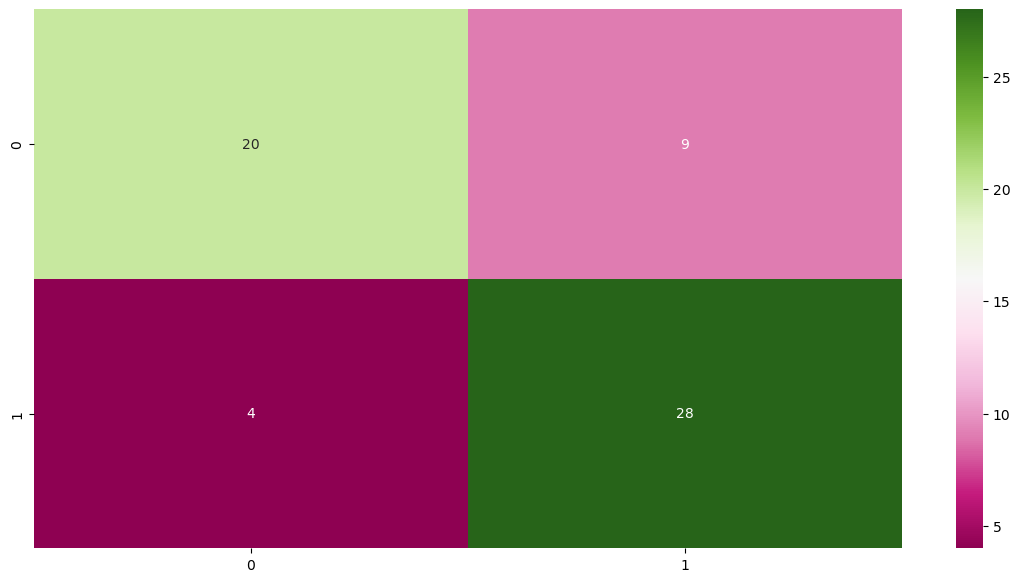

In [149]:
plt.figure(figsize=(14,7))
sns.heatmap(confusion_matrix(y_test, pred), annot = True,cmap='PiYG')

## Model Optimization

#### Mannual Tunnning

In [150]:
dt_tune = DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split=5)

In [151]:
dt_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)

In [152]:
pred_m = dt_tune.predict(X_test)

In [153]:
print("Accuracy Score", accuracy_score(y_test, pred_m))

Accuracy Score 0.8360655737704918


In [154]:
print("F1_score", f1_score(y_test, pred_m))

F1_score 0.8571428571428572


In [155]:
print("AUC Score", roc_auc_score(y_test, pred_m))

AUC Score 0.8308189655172413


In [156]:
print(classification_report(y_test,pred_m))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81        29
           1       0.79      0.94      0.86        32

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



<Axes: >

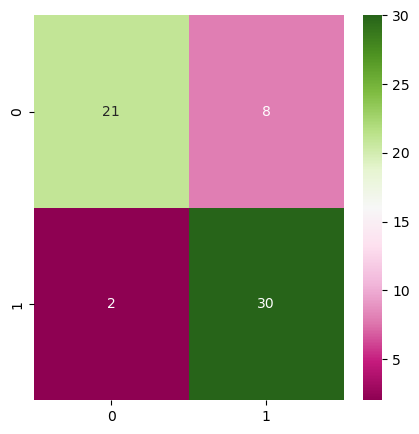

In [157]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, pred_m), annot = True,cmap='PiYG')

## Conclusion 
**First, the AUC score of around 0.83 means that the model is quite good at distinguishing between two different groups or classes, which is super important in the kind of problems we're solving.**

**Second, the accuracy score of about 0.84 suggests that the model is right about 84% of the time when it makes predictions. That's pretty accurate!**

**Lastly, the F1 score of around 0.86 shows that our model is not only accurate but also good at finding both the right answers and avoiding wrong ones.**

**Overall, our decision tree model is showing impressive performance and looks like a reliable tool for making decisions in situations where we have two options to choose from.**